In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from IPython.display import Image, HTML

%matplotlib inline

#  NN III -- Convolutional Neural Networks

### Live ConvNet Demo in HTML and JavaScript

#### Live Convnet Demo in Javascript using iFrame in markdown cell.

Commented out in this cell.

<!--
<iframe src="/conv-demo/index.html" width="100%" height="700px;" style="border:none;"></iframe>
-->

#### Using IPython.display.*

In [1]:
import IPython

# src = "conv-demo/index.html"
# src = "file:///Users/tomg/Source/courses/DS701-Tools-for-Data-Science/conv-demo/index.html"

# IPython.display.IFrame(src, width=974, height=550 )

In [2]:
import IPython

with open("conv-demo/index.html", "r") as f:
    html_content = f.read()

IPython.display.HTML(html_content)

## Training a Small Image Classification Model

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [4]:
%matplotlib inline

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1. Load and normalize CIFAR10

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
print(trainset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [12]:
#import torch
#from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

batch_size = 64

# Download and load the training data
trainset = torchvision.datasets.MNIST('./data/MNIST_data/', download=True,
                                    train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST('./data/MNIST_data/', download=True,
                                    train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=True)

In [11]:
print(trainset.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


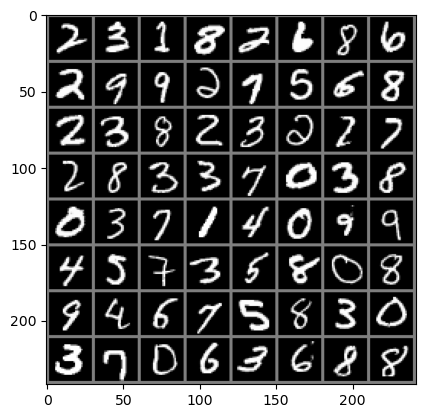

2 - two 3 - three 1 - one 8 - eight 2 - two 6 - six 8 - eight 6 - six 2 - two 9 - nine 9 - nine 2 - two 7 - seven 5 - five 6 - six 8 - eight 2 - two 3 - three 8 - eight 2 - two 3 - three 2 - two 2 - two 7 - seven 2 - two 8 - eight 3 - three 3 - three 7 - seven 0 - zero 3 - three 8 - eight 0 - zero 3 - three 7 - seven 1 - one 4 - four 0 - zero 9 - nine 9 - nine 4 - four 5 - five 7 - seven 3 - three 5 - five 8 - eight 0 - zero 8 - eight 9 - nine 4 - four 6 - six 7 - seven 5 - five 8 - eight 3 - three 0 - zero 3 - three 7 - seven 0 - zero 6 - six 3 - three 6 - six 8 - eight 8 - eight


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(batch_size)))

In [16]:
# Assuming batch_size is 64 and images are displayed in an 8x8 grid
for i in range(8):
    print(' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(i * 8, (i + 1) * 8)))

0 - zero 1 - one 4 - four 0 - zero 4 - four 5 - five 3 - three 7 - seven
4 - four 5 - five 3 - three 3 - three 1 - one 5 - five 2 - two 6 - six
4 - four 1 - one 8 - eight 4 - four 4 - four 4 - four 2 - two 7 - seven
7 - seven 1 - one 7 - seven 4 - four 3 - three 3 - three 7 - seven 6 - six
5 - five 4 - four 3 - three 0 - zero 7 - seven 7 - seven 3 - three 5 - five
6 - six 1 - one 3 - three 3 - three 1 - one 9 - nine 1 - one 4 - four
3 - three 7 - seven 6 - six 1 - one 1 - one 3 - three 8 - eight 1 - one
0 - zero 2 - two 7 - seven 5 - five 3 - three 7 - seven 9 - nine 3 - three


### 2. Define a Convolutional Neural Network


In [8]:
# network for CIFAR10 from PyTorch tutorial
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
# network for CIFAR10 as proposed by CoPilot
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(576, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

net = Net()

In [23]:
# network for MNIST
import torch
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

### 3. Define a Loss function and optimizer
We'll use a Classification Cross-Entropy loss and SGD with momentum.

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.152
[1,  4000] loss: 1.831
[1,  6000] loss: 1.647
[1,  8000] loss: 1.560
[1, 10000] loss: 1.507
[1, 12000] loss: 1.458
[2,  2000] loss: 1.391
[2,  4000] loss: 1.372
[2,  6000] loss: 1.339
[2,  8000] loss: 1.288
[2, 10000] loss: 1.294
[2, 12000] loss: 1.283
Finished Training


Not necessary, but we save the network to storage.

In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Display some of the images from the test set with the ground truth labels.

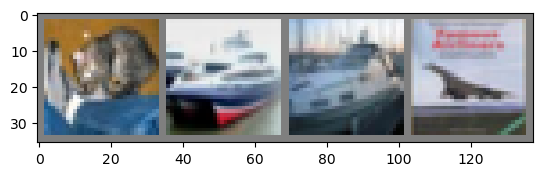

GroundTruth:  cat   ship  ship  plane


In [12]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

We'll load the model back from storage, which is not strictly necessary since it
is still in memory, but for illustration purposes.

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Let's run inference (forward pass) on the model to get numeric outputs.

In [14]:
outputs = net(images)

Get the index of the element with highest value and print the label 
associated with that index.

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   ship 


Evaluate over the entire test set.

In [16]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


Evaluate the performance per class.

In [17]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 44.6 %
Accuracy for class: car   is 72.7 %
Accuracy for class: bird  is 43.4 %
Accuracy for class: cat   is 30.7 %
Accuracy for class: deer  is 51.5 %
Accuracy for class: dog   is 38.4 %
Accuracy for class: frog  is 59.7 %
Accuracy for class: horse is 63.6 %
Accuracy for class: ship  is 80.5 %
Accuracy for class: truck is 70.2 %


## Convolutional Neural Networks

### Example with 1-D Input Data

In _convolutional neural networks_, we define a set of weights that we move across
the input data.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>
<img src="figs/NN-figs/L25-conv04.png" height="75%">
</center> 

Example with 3 weights and input of length 6.

For figure (a), we calculate 

$$ z_2 = \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 $$

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv05.png" height="75%">
</center> 

To calculate $z_2$, we shift the weights over 1 place (figure (b)) and then
weight and sum the inputs. We can generalize the equation slightly.

$$ z_i = \omega_1 x_{i - 1} + \omega_2 x_i + \omega_3 x_{i+1} $$

But what do we do about $z_1$?

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->

<center>
<img src="figs/NN-figs/L25-conv06.png" height="75%">
</center> 

We can calculate $z_1$ by _padding_ our input data. In figure (c), we
simply add $0$, which means we can now calculate $z_1$.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv07.png" height="75%">
</center> 

Alternatively, we can just reduce the size of the output, by only calculating where
we have _valid_ input data, as in figure (d).

For 1-D data, this reduces the output size by 1 at the beginning and end of the
data, so by 2 overall for length-3 filter.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv-fig10-3.png" height="75%">
</center> 

There are a few design choices one can make with convolution layers, such as:

1. _filter length_, e.g. size 3 in figures (a) and (b)
2. _stride_, which is how much you shift to calculate the next output. Common values are
    1. _stride 1_ as we saw in the previous examples and in figures (c) and (d)
    2. _stride 2_, where you shift by 2 instead of 1, an effectively halve the size of the output as in figures (a) and (b)
3. _dilation_, where you expand the filter as in figure (d)

### 2D Convolution

For images and video frames we use a two-dimensional convolution
(called `conv2d` in PyTorch) which is an extension of the 1-D
convolution as shown in the following illustration.

(iFrame markdown commented out)
<!--
<iframe src="conv-demo/index.html" width="100%" height="700px;" style="border:none;"></iframe>
-->

In [3]:
import IPython

# src = "conv-demo/index.html"
# src = "file:///Users/tomg/Source/courses/DS701-Tools-for-Data-Science/conv-demo/index.html"

# IPython.display.IFrame(src, width=974, height=550 )

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv-2d.png" height="50%">
</center> 

## Batches and Stochastic Gradient Descent

Illustrate with the dataloader iterable...

Mention how SGD can improve optimization...